# FX cross verification by MC

In [1]:
import numpy as np
from frh_fx import mpl, nig, frh, uts, sim, blk
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
mpl.config(scale=1.5,print_keys=False)

In [3]:
T = np.array([1])
k = uts.get_logstrikes(T)
σ1,ρ1 = 0.11, 0.25
σ2,ρ2 = 0.09,-0.50
γ = 1
ρ = 0.5

In [4]:
α1,β1,δ1,μ1 = frh.nig_params(σ1,ρ1,γ)
α2,β2,δ2,μ2 = frh.nig_params(σ2,ρ2,γ)

In [5]:
θ1 = α1,β1,δ1
θ2 = α2,β2,δ2
α3,β3,δ3,μ3 = nig.cross_params(θ1,θ2,ρ)
θ3 = α3,β3,δ3

In [6]:
m,n = 2**17,2**0
t = np.linspace(0,T,n+1)
Δ = T/n

In [7]:
np.random.seed(0)
ɛ1,ɛ2 = sim.correlated_noise(ρ,size=(m,n))

In [8]:
v = sim.subordinator(T,γ,size=(m,n))
v1 = sim.scaled_sub(v,σ1,ρ1)
v2 = sim.scaled_sub(v,σ2,ρ2)

In [9]:
X1 = sim.nig_process(v1,ɛ1,Δ,θ1)
X2 = sim.nig_process(v2,ɛ2,Δ,θ2)
X3 = X1/X2

In [10]:
P1 = sim.prices(X1,k,T)
P2 = sim.prices(X2,k,T)
P3 = sim.prices(X3,k,T,N=X2)

In [11]:
BS1 = blk.surface(k,T,P1)
BS2 = blk.surface(k,T,P2)
BS3 = blk.surface(k,T,P3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


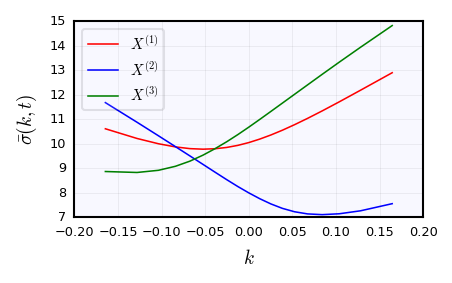

In [12]:
plot,axes = plt.subplots()
axes.plot(k[0,:],100*BS1[0,:],'r')
axes.plot(k[0,:],100*BS2[0,:],'b')
axes.plot(k[0,:],100*BS3[0,:],'g')
axes.legend([r'$X^{(1)}$',
             r'$X^{(2)}$',
             r'$X^{(3)}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t)$');
uts.save_plot()

In [14]:
uts.save_data(k,T,BS3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/data/20180523-091741


Now demo some sample paths

In [91]:
γ = 0.3
m,n = 7,2**8
t = np.linspace(0,T,n+1)
Δ = T/n

In [92]:
np.random.seed(0)
ɛ1,ɛ2 = sim.correlated_noise(ρ,size=(m,n))

In [93]:
v = sim.subordinator(T,γ,size=(m,n))
v1 = sim.scaled_sub(v,σ1,ρ1)
v2 = sim.scaled_sub(v,σ2,ρ2)

In [94]:
X1 = sim.nig_process(v1,ɛ1,Δ,θ1)
X2 = sim.nig_process(v2,ɛ2,Δ,θ2)
X3 = X1/X2

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


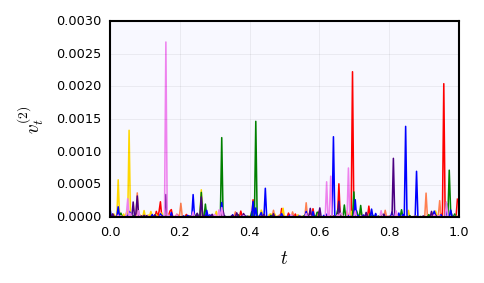

In [97]:
plot,axes = plt.subplots()
axes.plot(t[:-1],v2.T)
axes.set_xlabel(r'$t$')
axes.set_ylabel(r'$v^{(2)}_t$');
uts.save_plot()

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


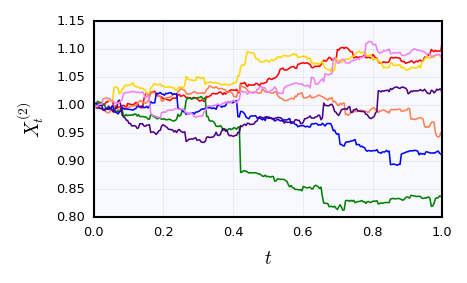

In [98]:
plot,axes = plt.subplots()
axes.plot(t,X2.T)
axes.set_xlabel(r'$t$')
axes.set_ylabel(r'$X^{(2)}_t$');
uts.save_plot()